# Mission 2. Abengers, Assemble!

Bicsubi를 다 만들고 보니 사이렌이 울렸다. 국제보안기구 <U.B.U.N.T.U>에게서 긴급 이메일이 도착했다. 죄없는 컴퓨터들에게 무차별적인 Request를 통해 이상상태로 만드는 악당 <디도스>가 인터넷을 침략하려고 한다는 소식을 전했다. 이를 막기 위해 최정예부대인 우리는 Abengers (저작권을 조심합시다) 를 소집하기로 했다. 도와줘요 Abengers!

## Core Mission

- **다음 질문에 답하시오**
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [19]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [20]:
# 데이터 불러오기

characters = pd.read_csv('./charcters_stats.csv')
characters.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
6,Adam Monroe,good,63,10,12,100,71,64,320
7,Adam Strange,good,1,1,1,1,0,1,5
8,Agent 13,good,1,1,1,1,0,1,5
9,Agent Bob,good,10,8,13,5,5,20,61


### 1. 수치의 합이 가장 큰 캐릭터 찾기

각 캐릭터의 수치의 총합은 Total Column에 있으므로 Total이 가장 큰 캐릭터를 찾으면 된다.

In [21]:
characters[characters['Total'] == max(characters['Total'])]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


#### 수치의 합이 가장 큰 캐릭터는 Martian Manhunter이다

### 2. 히어로들과 빌런들의 능력치 분포를 시각화

#### 수치 능력치가 6가지임으로 육각형으로 시각화 할수 있는 레이더차트를 구현한다.

In [30]:
# 히어로와 빌런의 평균 능력치 구하기

character_group = characters.groupby(['Alignment'], as_index=False).mean()
character_group.drop(['Total'], axis=1, inplace=True)
character_group.drop([2], inplace=True)
character_group

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
0,bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303
1,good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648


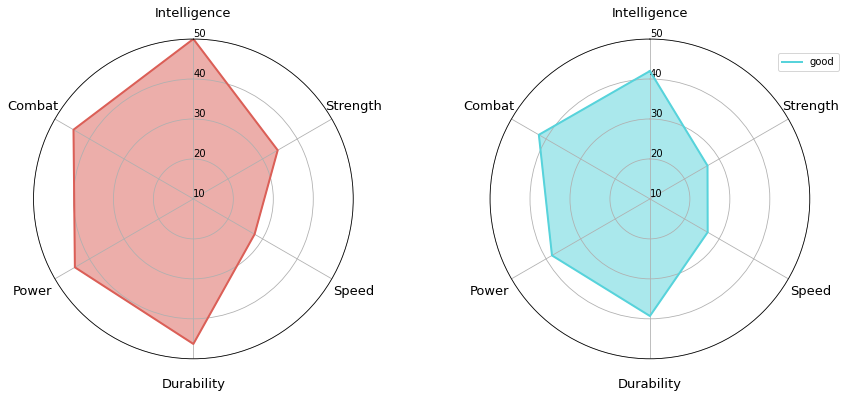

In [50]:
# 레이더 차트 그리기
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# 따로 그리기
labels = character_group.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = sns.color_palette('hls', 2)

fig = plt.figure(figsize=(15, 20))
fig.set_facecolor('white')

for i, row in character_group.iterrows():
    color = my_palette[i]
    data = character_group.iloc[i].drop('Alignment').tolist()
    data += data[:1]
    ax = plt.subplot(3, 2, i+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)
    
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50], ['10', '20', '30', '40', '50'], fontsize=10)
    plt.ylim(10, 50)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Alignment)
    ax.fill(angles, data, color=color, alpha=0.5)
    
plt.legend(loc=(0.9, 0.9))
plt.show()

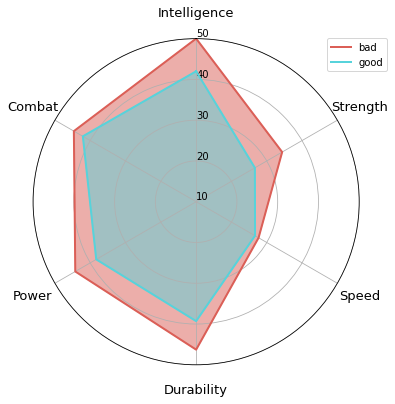

In [55]:
# 같이 그리기

my_palette = sns.color_palette("hls", 2)
fig = plt.figure(figsize=(6, 6))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in character_group.iterrows():
    color = my_palette[i]
    data = character_group.iloc[i].drop('Alignment').tolist()
    data += data[:1]
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize=13)
    ax.tick_params(axis='x', which='major', pad=15)
    
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50], ['10', '20', '30', '40', '50'], fontsize=10)
    plt.ylim(10, 50)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Alignment)
    ax.fill(angles, data, color=color, alpha=0.5)
    
plt.legend(loc=(0.9, 0.9))
plt.show()